In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

df = pd.read_csv('TDI_MP_database.csv')

keep_columns=['mat_1_atomic_number','mat_1_fraction', 'mat_2_atomic_number', 
              'Nsites','a','b','c','alpha','beta','gamma', 'bg_col', 'energy_per_site','sg_no','hull_energy',
             'vol_per_site','formation_energy', 'density']

df=df[keep_columns]

X = df.copy()

y = X['bg_col']

X.drop('bg_col', axis=1, inplace=True)

X_std = StandardScaler().fit_transform(X)

# X.head()

cov_mat = np.cov(X_std.T)

# eigen decomposition of covariance matrix

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)


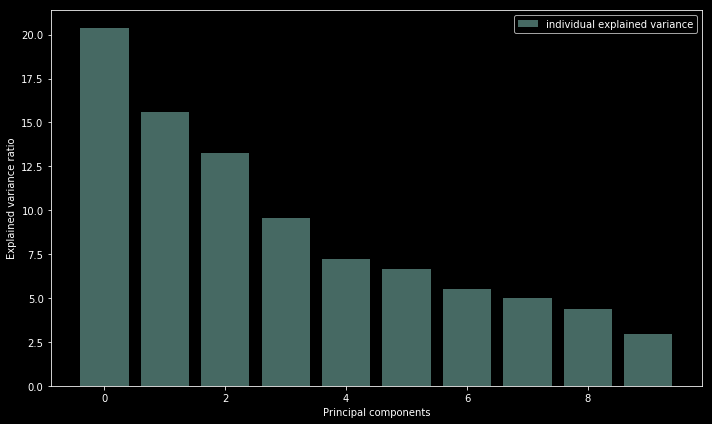

In [2]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

with plt.style.context('dark_background'):
    plt.figure(figsize=(10, 6))

    plt.bar(range(10), var_exp[:10], alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()